In [1]:
import json
import pandas as pd

In [2]:
def get_target_features(all_features, white_list_features=[]):
    target_features = white_list_features
    if not white_list_features:
        target_features = all_features
    return target_features


def show_stats(data, white_list_features=[]):
    all_features = [k for k in data]
    target_features = get_target_features(all_features, white_list_features)

    for feature in target_features:
        print(f"\n{feature}\n")
        feature_metrics = data[feature]
        df = pd.DataFrame.from_dict(feature_metrics)
        display(df)


def prepare_histogram_data(data, white_list_features=[]):
    all_features = [k for k in data]
    target_features = get_target_features(all_features, white_list_features)

    feature_hists = {}
    feature_edges = {}

    for feature in target_features:
        xs = data[feature]['histogram']
        hists = {}
        feature_edges[feature] = []
        for i, ds in enumerate(xs):
            ds_hist = xs[ds]
            ds_bucket_counts = []
            for bucket in ds_hist:
                if i == 0:
                    feature_edges[feature].append(bucket[0])
                ds_bucket_counts.append(bucket[2])
                hists[ds] = ds_bucket_counts
        feature_hists[feature] = hists

    return feature_hists, feature_edges


def show_histograms(data, white_list_features=[]):
    (hists, edges) = prepare_histogram_data(data)

    all_features = [k for k in edges]
    target_features = get_target_features(all_features, white_list_features)

    for feature in target_features:
        hist_data = hists[feature]
        index = edges[feature]
        df = pd.DataFrame(hist_data, index=index)
        axes = df.plot.line(rot=40, title = feature)
        axes = df.plot.line(rot=40, subplots=True, title = feature)


In [3]:
with open('adults_stats.json', 'r') as f:
    data = json.load(f)

In [6]:
show_stats(data)


Age



,count,mean,sum,stddev,histogram
site-2-train,13025,38.749098,504707,13.825030,"[[0.0, 12.0, 0], [12.0, 24.0, 1992], [24.0, 36..."
site-2-test,3256,38.840909,126466,13.947296,NaN
site-1-train,26049,38.554110,1004296,13.659589,"[[0.0, 12.0, 0], [12.0, 24.0, 3849], [24.0, 36..."
site-1-test,6512,38.691800,251961,13.564017,"[[0.0, 12.0, 0], [12.0, 24.0, 923], [24.0, 36...."
Global-train,39074,38.619107,1509003,13.715091,"[[0.0, 12.0, 0], [12.0, 24.0, 3849], [24.0, 36..."
Global-test,9768,38.741503,378427,13.692435,"[[0.0, 12.0, 0], [12.0, 24.0, 923], [24.0, 36...."



fnlwgt



,count,mean,sum,stddev,histogram
site-2-train,13025,188377.939271,2453622659,105717.803860,"[[9368.810068194409, 99360.25465383875, 2322],..."
site-2-test,3256,193666.956695,630579611,105613.629556,"[[9368.810068194409, 99360.25465383875, 527], ..."
site-1-train,26049,190260.754501,4956102394,105994.683154,"[[9368.810068194409, 99360.25465383875, 4421],..."
site-1-test,6512,187848.740479,1223270998,103737.629675,"[[9368.810068194409, 99360.25465383875, 1184],..."
Global-train,39074,189633.133362,7409725053,105904.834766,"[[9368.810068194409, 99360.25465383875, 4421],..."
Global-test,9768,189788.145885,1853850609,104397.341204,"[[9368.810068194409, 99360.25465383875, 1184],..."



Education-Num



,count,mean,sum,stddev,histogram
site-2-train,13025,10.056430,130985,2.568585,"[[0.7125744965135961, 1.6981499463382674, 31],..."
site-2-test,3256,10.138821,33012,2.562716,"[[0.7125744965135961, 1.6981499463382674, 1], ..."
site-1-train,26049,10.079120,262551,2.566020,"[[0.7125744965135961, 1.6981499463382674, 40],..."
site-1-test,6512,10.086916,65686,2.599541,"[[0.7125744965135961, 1.6981499463382674, 11],..."
Global-train,39074,10.071557,393536,2.566865,"[[0.7125744965135961, 1.6981499463382674, 40],..."
Global-test,9768,10.104218,98698,2.587308,"[[0.7125744965135961, 1.6981499463382674, 11],..."



Capital Gain



,count,mean,sum,stddev,histogram
site-2-train,13025,1082.276775,14096655,7629.928600,"[[-8.872709934282201e-06, 6062.097221452759, 1..."
site-2-test,3256,1080.418305,3517842,7398.242323,"[[-8.872709934282201e-06, 6062.097221452759, 3..."
site-1-train,26049,1079.726631,28125799,7386.072606,"[[-8.872709934282201e-06, 6062.097221452759, 2..."
site-1-test,6512,1069.337377,6963525,7382.730202,"[[-8.872709934282201e-06, 6062.097221452759, 6..."
Global-train,39074,1080.576701,42222454,7468.147239,"[[-8.872709934282201e-06, 6062.097221452759, 2..."
Global-test,9768,1073.031020,10481367,7387.527628,"[[-8.872709934282201e-06, 6062.097221452759, 6..."



Capital Loss



,count,mean,sum,stddev,histogram
site-2-train,13025,85.181574,1109490,397.055101,"[[-8.601899471614955e-06, 255.2655661576187, 1..."
site-2-test,3256,98.770885,321598,426.340744,"[[-8.601899471614955e-06, 255.2655661576187, 3..."
site-1-train,26049,86.645169,2257020,401.635070,"[[-8.601899471614955e-06, 255.2655661576187, 2..."
site-1-test,6512,89.938575,585680,408.238516,"[[-8.601899471614955e-06, 255.2655661576187, 6..."
Global-train,39074,86.157291,3366510,400.109714,"[[-8.601899471614955e-06, 255.2655661576187, 2..."
Global-test,9768,92.882678,907278,414.359558,"[[-8.601899471614955e-06, 255.2655661576187, 6..."



Hours per week



,count,mean,sum,stddev,histogram
site-2-train,13025,40.413589,526387,12.417210,"[[0.7470002546684569, 6.93184294930055, 102], ..."
site-2-test,3256,40.306818,131239,12.726383,"[[0.7470002546684569, 6.93184294930055, 39], [..."
site-1-train,26049,40.419555,1052889,12.349766,"[[0.7470002546684569, 6.93184294930055, 223], ..."
site-1-test,6512,40.509060,263795,12.338762,"[[0.7470002546684569, 6.93184294930055, 46], [..."
Global-train,39074,40.417567,1579276,12.372130,"[[0.7470002546684569, 6.93184294930055, 223], ..."
Global-test,9768,40.441646,395034,12.469021,"[[0.7470002546684569, 6.93184294930055, 46], [..."


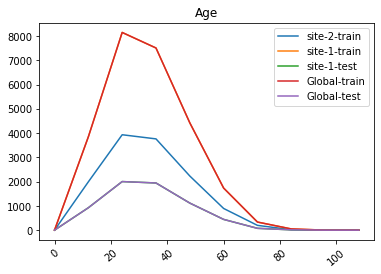

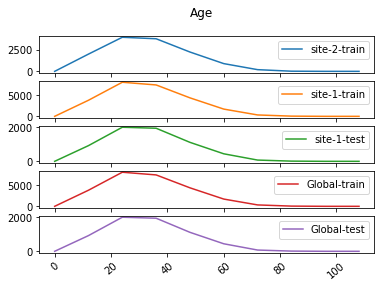

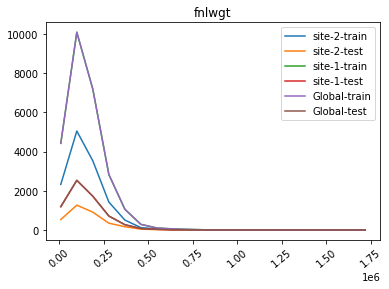

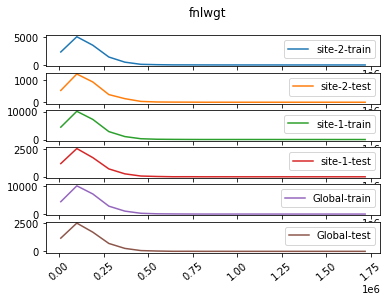

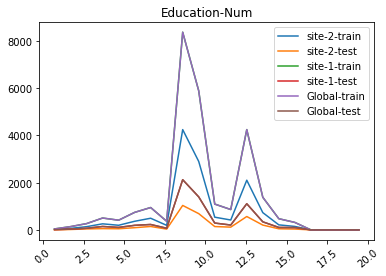

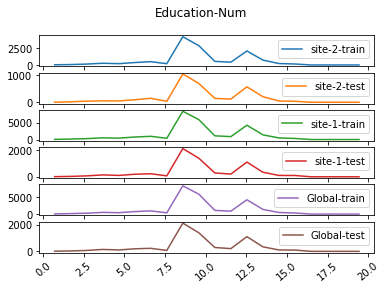

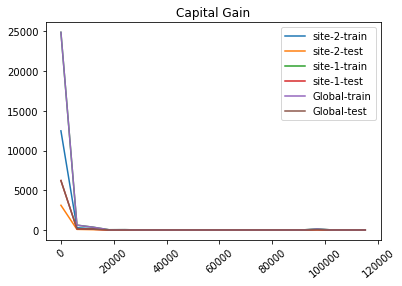

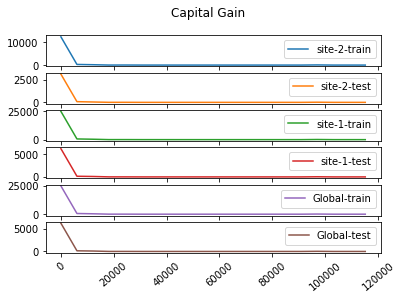

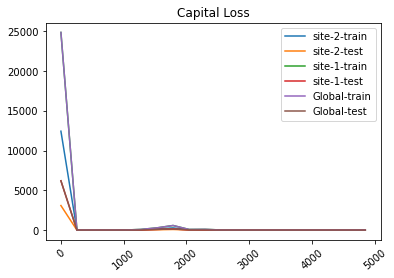

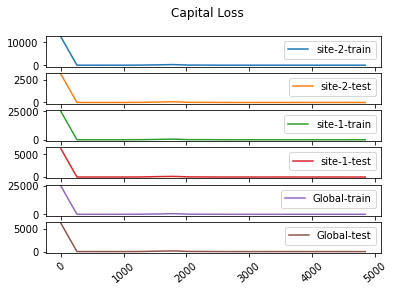

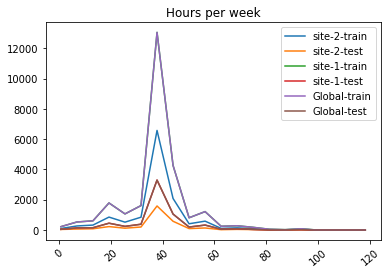

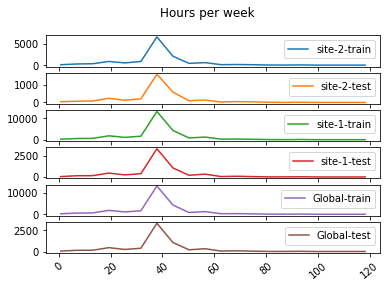

In [5]:
show_histograms(data)